In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

index=["sepal length ",
"sepal width ",
"petal length", 
"petal width",
"class"]

df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\iris\iris.data",names=index)

In [78]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.shape

(150, 5)

In [80]:
df.isnull().sum()

sepal length     0
sepal width      0
petal length     0
petal width      0
class            0
dtype: int64

array([[<Axes: title={'center': 'sepal length '}>,
        <Axes: title={'center': 'sepal width '}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

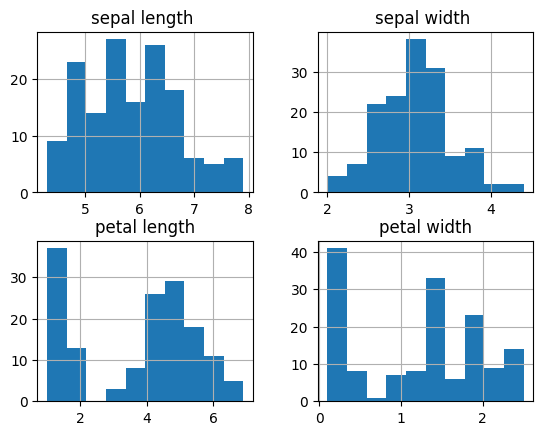

In [81]:
df.hist()

In [82]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_log = df.drop(columns='class').apply(np.log1p)

In [84]:
df_log['class']=df['class']

In [85]:
df_log['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [86]:
from sklearn.preprocessing import StandardScaler as sca
scaler = sca()       
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_log.drop(columns='class')),
    columns=df_log.drop(columns='class').columns,
    index=df_log.index
)

df_scaled['class'] = df_log['class']

In [87]:
df_scaled

,sepal length,sepal width,petal length,petal width,class
0,-0.898502,1.035145,-1.411502,-1.404824,Iris-setosa
1,-1.176422,-0.073026,-1.411502,-1.404824,Iris-setosa
2,-1.463927,0.386020,-1.511327,-1.404824,Iris-setosa
3,-1.611485,0.159297,-1.315752,-1.404824,Iris-setosa
4,-1.036304,1.241935,-1.411502,-1.404824,Iris-setosa
...,...,...,...,...,...
145,1.043407,-0.073026,0.814615,1.240559,Iris-virginica
146,0.598671,-1.329366,0.737705,0.902664,Iris-virginica
147,0.824005,-0.073026,0.814615,0.991319,Iris-virginica
148,0.483679,0.823708,0.889083,1.240559,Iris-virginica


array([[<Axes: title={'center': 'sepal length '}>,
        <Axes: title={'center': 'sepal width '}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

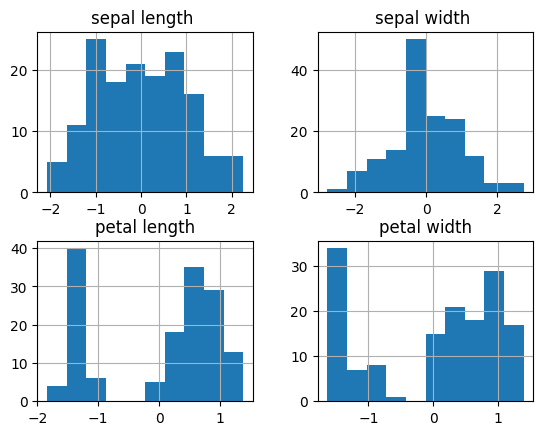

In [88]:
df_scaled.drop(columns='class').hist()

<Axes: >

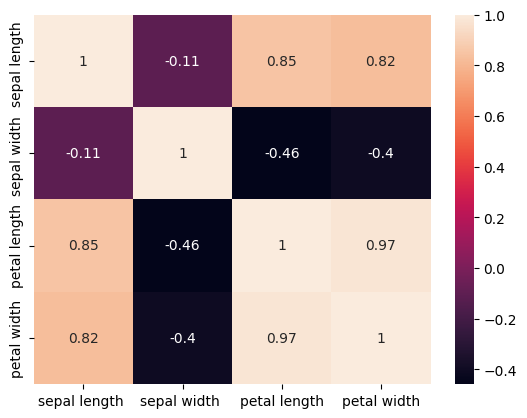

In [89]:
cor=df_scaled.drop(columns='class').corr()
sns.heatmap(cor,annot=True)

In [90]:
df_new=pd.get_dummies(df_scaled,columns=['class'])

In [91]:
df_new

,sepal length,sepal width,petal length,petal width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,-0.898502,1.035145,-1.411502,-1.404824,True,False,False
1,-1.176422,-0.073026,-1.411502,-1.404824,True,False,False
2,-1.463927,0.386020,-1.511327,-1.404824,True,False,False
3,-1.611485,0.159297,-1.315752,-1.404824,True,False,False
4,-1.036304,1.241935,-1.411502,-1.404824,True,False,False
...,...,...,...,...,...,...,...
145,1.043407,-0.073026,0.814615,1.240559,False,False,True
146,0.598671,-1.329366,0.737705,0.902664,False,False,True
147,0.824005,-0.073026,0.814615,0.991319,False,False,True
148,0.483679,0.823708,0.889083,1.240559,False,False,True


In [92]:

X = df_new.drop(columns=[
    'class_Iris-setosa',
    'class_Iris-versicolor',
    'class_Iris-virginica'
])


y = df_new[['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']]


In [93]:
y_class = np.argmax(y.values, axis=1)

In [94]:
label_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [95]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='linear')  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred, target_names=label_map.values()))

Accuracy: 96.66666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='rbf')  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred, target_names=label_map.values()))


Accuracy: 100.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



PCA:
Centers the data (subtracts the mean)

Finds the directions (vectors) of maximum variance

Projects the data onto these new directions

Keeps the top k components that explain the most variance

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_class, test_size=0.2, random_state=42
)

*A kernel function transforms the input data into a higher-dimensional space without explicitly computing the coordinates in that space. This helps SVM find a hyperplane that separates the classes, even when they aren’t linearly separable in the original space.*

types :

'linear' :	When data is roughly linearly separable

'poly'	 :For more complex boundaries (e.g., spirals)

'rbf'	Radial Basis Function (a.k.a. Gaussian) — the default	Most commonly used, handles non-linear problems

'sigmoid'	Simulates a neural network activation function	Rarely used, experimental

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='linear')  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred, target_names=label_map.values()))


Accuracy: 90.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



# final visualization

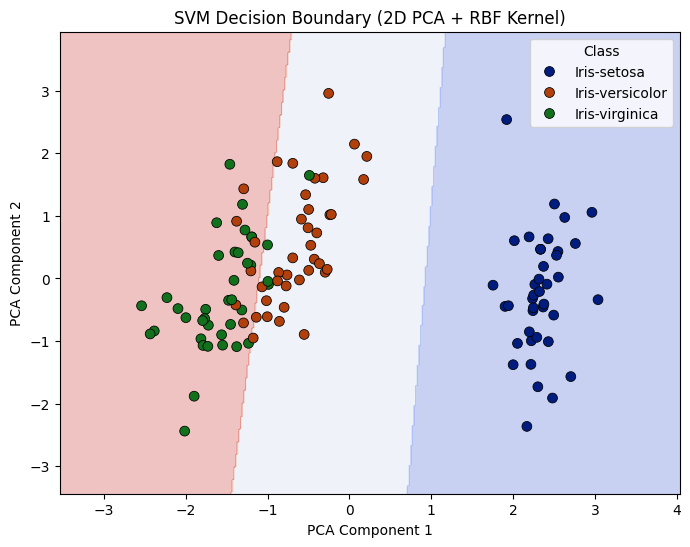

In [75]:

h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot training data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1],
                hue=[label_map[i] for i in y_train],
                palette='dark', edgecolor='k', s=50)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Decision Boundary (2D PCA + RBF Kernel)")
plt.legend(title="Class")
plt.show()
